In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from matplotlib.pyplot import rc_context

In [2]:
## set working directory
os.chdir("/data1/niehu/ibd_public_data_20210821/analysis_20220111/02.integrate/Mesenchymal/")

In [3]:
adata0 = sc.read_h5ad("./Mesenchymal.bySample.n10.filtered.re-run.h5ad")

In [4]:
## read data
adata = sc.read_h5ad("Mesenchymal.bySample.n10.filter.bbknn_umap_leiden_marker.res1.2.h5ad")
adata.raw = adata0.raw.to_adata()
adata = sc.pp.subsample(adata, fraction=1., copy=True)

In [5]:
## add meta data
meta_data = pd.read_csv("/home/niehu/niehu/ibd_public_data_20210821/analysis_20220111/01.preprocess/cell_meta/ibd_meta_data_cells.csv", header=0)
meta_data.index = meta_data.cellName

select = meta_data[meta_data.index.isin(adata.obs.index.to_list())]
select = select.loc[adata.obs.index,:]

adata.obs["location2"] = pd.Categorical(select.location2)
adata.obs["location1"] = pd.Categorical(select.location1)
adata.obs["developmentStage"] = pd.Categorical(select.developmentStage)

/home/niehu/niehu/soft/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3012: DtypeWarning: Columns (3,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


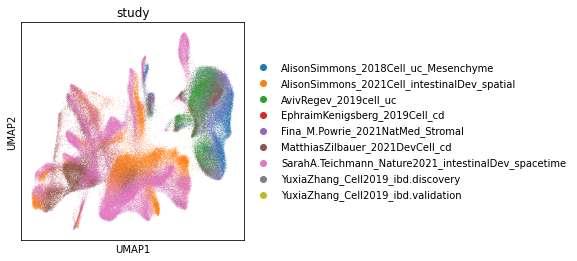

In [6]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["study"])

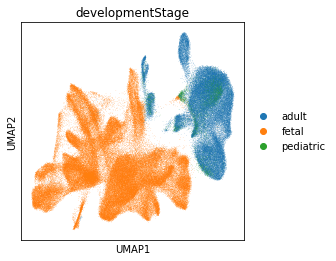

In [7]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["developmentStage"])

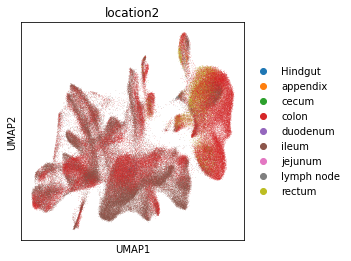

In [8]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=["location2"])

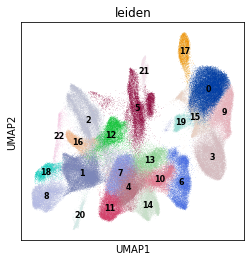

In [8]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)

In [ ]:
major_markers = ["EPCAM", # epithelial
                 "CDH5","PTPRB",  # endothelial
                 "COL1A1","COL1A2","COL6A1","COL6A2","COL6A3","DCN","THY1", ## Mesenchymal
                 "ETV1","BNC2","FOXD3","SOX10",  # neuronal
                 "PTPRC", # immune cells
                 "KIT","TPSAB1", # mast cells
                 "CD14","LYZ", # myeloid
                 "CD3D","CD3G","CD4","CD8A","CD8B","NKG7", # T/NK cells
                 "CD79A","CD19","MS4A1","MZB1","TNFRSF17", # B/plasmal cells
                 "HBA1","HBA2",
                 "MKI67","TOP2A",
                 ]
sc.pl.dotplot(adata, major_markers, groupby='leiden')

In [10]:
## C8 => SMC 1
## C18 => SMC 2
## C22 => Cycling SMC
## C1 => Mesoderm 1
## C4/7/11 => Mesoderm 2
## C20 => Mesothelium
## C5 => Immature pericyte
## C21 => Mature pericyte
## C14 => Myofibroblast 1
## C19 => Myofibroblast 2
## C2 => Cycling stromal
## C15 => Stromal 4
## C12/C16 => Stromal 3
## C6 => Fetal stromal 2
## C3 => Stromal 2
## C10/13 => Fetal stromal 1
## C0/C9 => Stromal 1
## C17 => Transitional stromal

In [11]:
adata.obs["label"] = "Mesenchymal"

select = adata.obs[ adata.obs.leiden.isin(['10','13']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Fetal stromal 1'

select = adata.obs[ adata.obs.leiden.isin(['0','9']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Stromal 1'

select = adata.obs[ adata.obs.leiden.isin(['17']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Transitional stromal'

select = adata.obs[ adata.obs.leiden.isin(['6']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Fetal stromal 2'

select = adata.obs[ adata.obs.leiden.isin(['3']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Stromal 2'

select = adata.obs[ adata.obs.leiden.isin(['2']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Cycling stromal'

select = adata.obs[ adata.obs.leiden.isin(['12','16']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Stromal 3'

select = adata.obs[ adata.obs.leiden.isin(['15']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Stromal 4'

select = adata.obs[ adata.obs.leiden.isin(['1']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Mesoderm 1'

select = adata.obs[ adata.obs.leiden.isin(['4','7','11']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Mesoderm 2'

select = adata.obs[ adata.obs.leiden.isin(['14']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Myofibroblast 1'

select = adata.obs[ adata.obs.leiden.isin(['19']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Myofibroblast 2'

select = adata.obs[ adata.obs.leiden.isin(['5']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Immature pericyte'

select = adata.obs[ adata.obs.leiden.isin(['21']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Mature pericyte'

select = adata.obs[ adata.obs.leiden.isin(['8']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'SMC 1'

select = adata.obs[ adata.obs.leiden.isin(['18']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'SMC 2'

select = adata.obs[ adata.obs.leiden.isin(['22']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Cycling SMC'

select = adata.obs[ adata.obs.leiden.isin(['20']) ].index.to_list()
adata.obs.loc[select, 'label'] = 'Mesothelium'

In [12]:
newOrder = ["Fetal stromal 1","Stromal 1","Fetal stromal 2",'Stromal 2',"Stromal 3","Stromal 4","Transitional stromal","Cycling stromal",
            "Myofibroblast 1","Myofibroblast 2","SMC 1","SMC 2","Cycling SMC","Immature pericyte","Mature pericyte",
            "Mesoderm 1","Mesoderm 2","Mesothelium"]
adata.obs.label = pd.Categorical(adata.obs.label, categories = newOrder)

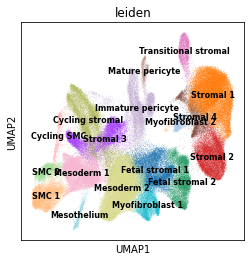

In [13]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='label', legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)

In [14]:
adata.obs["major"] = "Mesenchymal"

In [15]:
adata = adata.raw.to_adata()

In [16]:
del adata.obs["location1"]
del adata.obs["location2"]
del adata.obs["developmentStage"]

In [17]:
adata.write_h5ad("Mesenchymal.clean.h5ad")

... storing 'major' as categorical


In [18]:
adata.write_loom("Mesenchymal.clean.loom", write_obsm_varm=True)

In [19]:
## done